In [4]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Google_Stock_Price_Train.csv')
train_set = df.iloc[:,1:2].values

### Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)

### Creating a data structure with 60 timesteps and 1 output

In [21]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

### Reshaping

In [22]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

# Building RNN

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

### Initializing RNN

In [24]:
reg = Sequential()

### Adding LSTM

In [25]:
reg.add(LSTM(units = 50,return_sequences =True,input_shape = (X_train.shape[1],1)))
reg.add(Dropout(0.2))

In [26]:
reg.add(LSTM(units = 50,return_sequences =True))
reg.add(Dropout(0.2))

In [27]:
reg.add(LSTM(units = 50,return_sequences =True))
reg.add(Dropout(0.2))

In [28]:
reg.add(LSTM(units = 50))
reg.add(Dropout(0.2))

### Adding output layer

In [29]:
reg.add(Dense(units=1))

# Compiling the rnn

In [30]:
reg.compile(optimizer = 'Adam', loss = 'mean_squared_error')

### Fitting the training set

In [31]:
reg.fit(X_train,y_train, epochs=100,batch_size = 32)

Epoch 1/100
38/38 [==============================] - 8s 64ms/step - loss: 0.0374
Epoch 2/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0073
Epoch 3/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0061
Epoch 7/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0041
Epoch 13/100
38

38/38 [==============================] - 5s 139ms/step - loss: 0.0017
Epoch 100/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0017


# Predicting and Visualizing the data

In [32]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = df_test.iloc[:,1:2].values

In [51]:
df_total = pd.concat((df['Open'],df_test['Open']),axis = 0)
inputs = df_total[len(df_total)-len(df_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(df_total)

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64


In [52]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = reg.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[783.86725]
 [781.1122 ]
 [781.88654]
 [783.75934]
 [787.1728 ]
 [792.76654]
 [797.35956]
 [798.39355]
 [797.94226]
 [797.7413 ]
 [798.1509 ]
 [798.6049 ]
 [798.8439 ]
 [799.52124]
 [800.4245 ]
 [805.1431 ]
 [811.99884]
 [818.7459 ]
 [821.4139 ]
 [815.6906 ]]


### Plotting


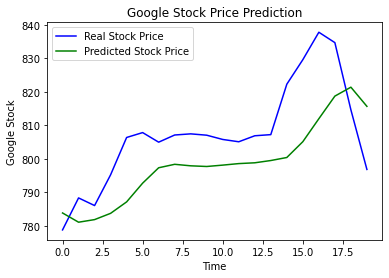

In [53]:
plt.plot(real_stock_price, color = 'blue', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = "Predicted Stock Price")
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock')
plt.legend()
plt.show()